## Conversion d'unité: tprate

Les données sont livrés en unités SI : cumul de pluie en mètres par seconde.

Nous voulons des cumuls en mm (norme météorologique) pour chaque mois.

La conversion est simple en elle même mais il faut prendre en compte que la longueur des mois varie (30, 31 jours...)

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('/home/jovyan/data/forecast/c3s_seasonal/peru_north/pr/2004/01/c3s_seasonal_peru_north_pr_2004-01.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 9, latitude: 11, number: 25, time: 6)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.0 -80.0 -79.0 ... -76.0 -75.0 -74.0
  * latitude   (latitude) float32 -3.4 -4.4 -5.4 -6.4 ... -11.4 -12.4 -13.4
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24
  * time       (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2004-06-01
Data variables:
    tprate     (time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-06 11:39:05 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
tprate = ds['tprate']

# Avant conversion :

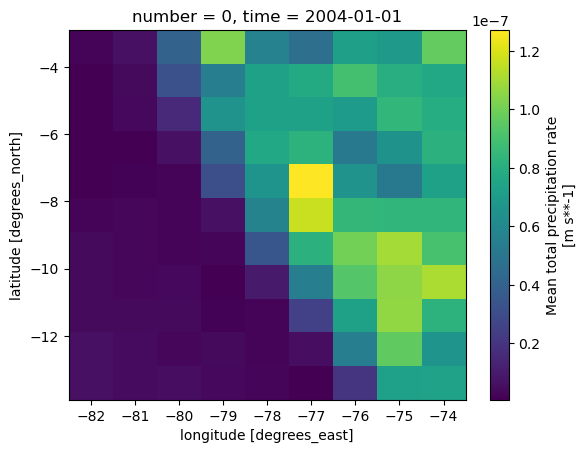

In [5]:
tprate.isel(time=0, number=0).plot()  # pour le test je prends le premier membre et le premier temps

In [9]:
# Get the number of days in each month
nb_days = ds.time.dt.days_in_month

# m/s to mm/day
conversion_factor = 1e3 * 3600 * 24 

# Apply conversion
tprate_mm_month = tprate * conversion_factor * nb_days


## Résultats après conversion !

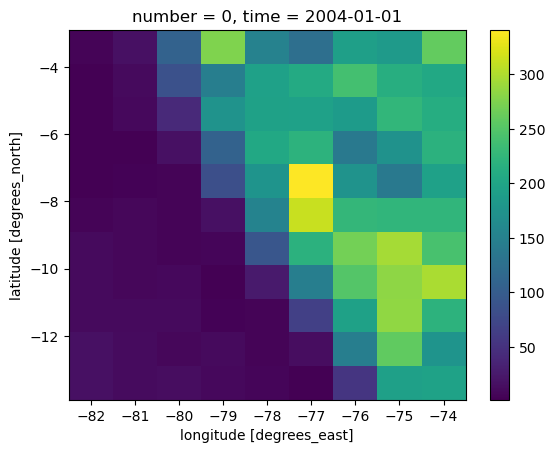

In [10]:
tprate_mm_month.isel(number=0, time=0).plot()